In [14]:
import pickle
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [3]:
with open('data.pkl', 'rb') as f:
    d=pickle.load(f)

df = pd.DataFrame(data=d)

df.style


,L-MLO,R-MLO,cancer_label,L-CC,R-CC,horizontal_flip
0,['0_L_MLO'],['0_R_MLO'],"{'left_malignant': 0, 'left_benign': 0, 'right_benign': 0, 'right_malignant': 0, 'unknown': 1, 'benign': 0, 'malignant': 0}",['0_L_CC'],['0_R_CC'],NO
1,['1_L_MLO'],['1_R_MLO'],"{'left_malignant': 0, 'left_benign': 0, 'right_benign': 0, 'right_malignant': 1, 'unknown': 0, 'benign': 0, 'malignant': 1}",['1_L_CC'],['1_R_CC'],NO
2,['2_L_MLO'],['2_R_MLO'],"{'left_malignant': 0, 'left_benign': 1, 'right_benign': 0, 'right_malignant': 0, 'unknown': 0, 'benign': 1, 'malignant': 0}",['2_L_CC'],['2_R_CC'],NO
3,['3_L_MLO'],['3_R_MLO'],"{'left_malignant': 1, 'left_benign': 1, 'right_benign': 1, 'right_malignant': 1, 'unknown': 0, 'benign': 1, 'malignant': 1}",['3_L_CC'],['3_R_CC'],NO


In [4]:
image_names = {}

def findNames(v):
    if labels[v] == 1:
        return v

for i, row in df.iterrows():
    labels = dict(df['cancer_label'][i])
    names = [x for x in map(findNames,labels.keys()) if x is not None]
    print(names)
    if 'unknown' in names:
        image_names[row['L-MLO'][0]] = 1
        image_names[row['R-MLO'][0]] = 1
        image_names[row['L-CC'][0]] = 1
        image_names[row['R-CC'][0]] = 1
    elif 'malignant' in names or 'benign' in names:
        switch = 1 if ('malignant' in names) else 0
        image_names[row['R-CC'][0]] = switch
        image_names[row['R-MLO'][0]] = switch
        image_names[row['L-MLO'][0]] = switch
        image_names[row['L-CC'][0]] = switch
        

new_df = pd.DataFrame(image_names.items(), columns=['images','cancerous'])
new_df.style

['unknown']
['right_malignant', 'malignant']
['left_benign', 'benign']
['left_malignant', 'left_benign', 'right_benign', 'right_malignant', 'benign', 'malignant']


,images,cancerous
0,0_L_MLO,1
1,0_R_MLO,1
2,0_L_CC,1
3,0_R_CC,1
4,1_R_CC,1
5,1_R_MLO,1
6,1_L_MLO,1
7,1_L_CC,1
8,2_R_CC,0
9,2_R_MLO,0


In [25]:
imgs = []
test_img = None
for image in new_df['images']:
    img_path = 'images/%s.png' % image
    img = Image.open(img_path).convert("L")
    img = img.resize((10,10))
    # img.save(img_path)
    test_img = img
    img_mat = np.asarray(img).flatten()
    imgs.append(img_mat)

imgs = np.array(imgs)

In [26]:
print(imgs.shape)
img_df = pd.DataFrame(imgs)
display(img_df)
print(new_df.shape)

(16, 100)


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,253,253,253,250,106,0,0,7,16,0,...,18,0,10,44,59,26,0,0,0,0
1,1,17,8,0,0,88,249,253,253,253,...,0,0,0,0,0,7,18,4,0,0
2,19,0,0,0,0,0,0,3,13,0,...,169,103,53,13,0,0,0,0,0,0
3,0,15,4,0,0,0,0,0,47,158,...,0,0,0,0,0,0,4,22,34,39
4,0,0,0,0,6,9,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
5,0,0,0,0,12,5,178,249,249,249,...,0,0,0,0,0,0,0,0,1,33
6,249,249,249,226,22,12,0,0,0,0,...,40,12,0,0,0,0,0,0,0,0
7,38,0,0,0,3,11,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,9,7,0,0,28,149,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,1,12,112,249,249,249,249,...,0,0,0,0,0,0,0,0,0,146


(16, 2)


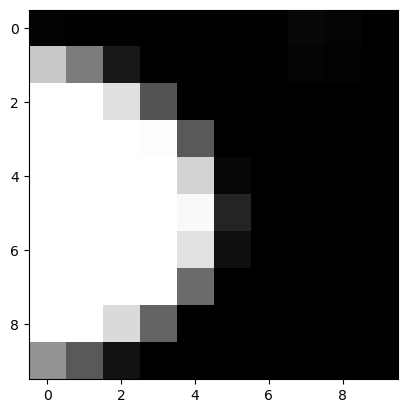

In [27]:
img = np.array(imgs[0]).reshape(10,10)

plt.imshow(np.asarray(test_img), cmap='gray', vmin=0, vmax=255)
plt.gray()
plt.show()

In [28]:
# new_df = new_df.drop('images', axis=1)
# cols = new_df.columns.tolist()
# cols = cols[-1:] + cols[:-1]
# new_df = new_df[cols]
df = pd.concat([new_df,img_df], axis=1)
df


,images,cancerous,0,1,2,3,4,5,6,7,...,90,91,92,93,94,95,96,97,98,99
0,0_L_MLO,1,253,253,253,250,106,0,0,7,...,18,0,10,44,59,26,0,0,0,0
1,0_R_MLO,1,1,17,8,0,0,88,249,253,...,0,0,0,0,0,7,18,4,0,0
2,0_L_CC,1,19,0,0,0,0,0,0,3,...,169,103,53,13,0,0,0,0,0,0
3,0_R_CC,1,0,15,4,0,0,0,0,0,...,0,0,0,0,0,0,4,22,34,39
4,1_R_CC,1,0,0,0,0,6,9,0,0,...,0,0,0,0,0,0,0,0,0,4
5,1_R_MLO,1,0,0,0,0,12,5,178,249,...,0,0,0,0,0,0,0,0,1,33
6,1_L_MLO,1,249,249,249,226,22,12,0,0,...,40,12,0,0,0,0,0,0,0,0
7,1_L_CC,1,38,0,0,0,3,11,0,0,...,0,0,0,0,0,0,0,0,0,0
8,2_R_CC,0,0,0,0,0,9,7,0,0,...,0,0,0,0,0,0,0,0,0,0
9,2_R_MLO,0,0,0,0,1,12,112,249,249,...,0,0,0,0,0,0,0,0,0,146


In [29]:
df.to_csv('breastTumors.csv')
